In [1]:
import pandas as pd 
import numpy as np 
import re
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet') 
nltk.download('averaged_perceptron_tagger')

df = pd.read_csv('C:\\Users\\asnab\\Desktop\\IMDB_Dataset.csv') 
print(f"✅ Loaded {len(df)} reviews")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asnab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asnab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\asnab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Loaded 50000 reviews


In [2]:

def clean_text(text):
    """
    Clean and preprocess text data 
    """ 
# Convert to lowercase 
    text = text.lower() 
# Remove HTML tags 
    text = re.sub(r'<[^>]+>', '', text) 
# Remove URLs 
    text = re.sub(r'http\S+|www\S+', '', text) 
# Remove special characters and digits 
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
# Remove extra whitespace 
    text = re.sub(r'\s+', ' ', text).strip()
    return text 
def advanced_preprocess(text):
    """ 
    Advanced preprocessing with tokenization and stopword removal 
    """ 
    # Clean text 
    text = clean_text(text) 
    
    # Tokenize 
    tokens = word_tokenize(text) 
# Remove stopwords 
    stop_words = set(stopwords.words('english')) 
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2] 
# Lemmatization 
    lemmatizer = WordNetLemmatizer() 
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens) 
# Test the functions 
sample_text = df['review'].iloc[0] 

print("📝 Original Text:") 
print(sample_text[:300]) 

print("\n🧹 Cleaned Text:") 
print(clean_text(sample_text)[:300]) 

print("\n⚡ Advanced Preprocessed Text:") 
print(advanced_preprocess(sample_text)[:300])

📝 Original Text:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Tru

🧹 Cleaned Text:
one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a 

⚡ Advanced Preprocessed Text:
one reviewer mentioned watching episode youll hooked right exactly happened methe first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called nickname given oswald maximum security s


In [3]:
# Apply preprocessing to all reviews 
print("🔄 Preprocessing all reviews...") 
df['cleaned_review'] = df['review'].apply(clean_text) 
df['processed_review'] = df['review'].apply(advanced_preprocess) 

# Compare original vs processed lengths 
df['original_length'] = df['review'].str.len() 
df['processed_length'] = df['processed_review'].str.len() 

print("📊 Preprocessing Impact:") 
print(f"Average original length: {df['original_length'].mean():.0f}characters") 

print(f"Average processed length: {df['processed_length'].mean():.0f} characters") 
print(f"Reduction: {((df['original_length'].mean() -df['processed_length'].mean()) / df['original_length'].mean() * 100):.1f}%") 
# Show examples 
display(df[['review', 'cleaned_review', 'processed_review']].head(3)) 

🔄 Preprocessing all reviews...
📊 Preprocessing Impact:
Average original length: 1309characters
Average processed length: 815 characters
Reduction: 37.7%


,review,cleaned_review,processed_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,one reviewer mentioned watching episode youll ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...


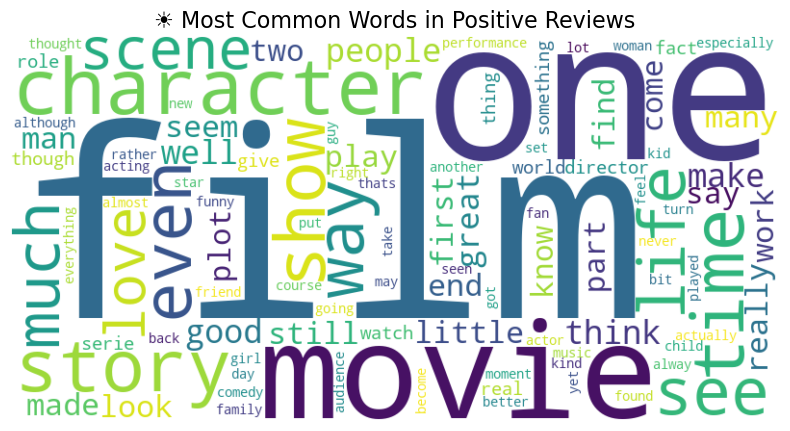

C:\Users\asnab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9928 (\N{THUNDER CLOUD AND RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


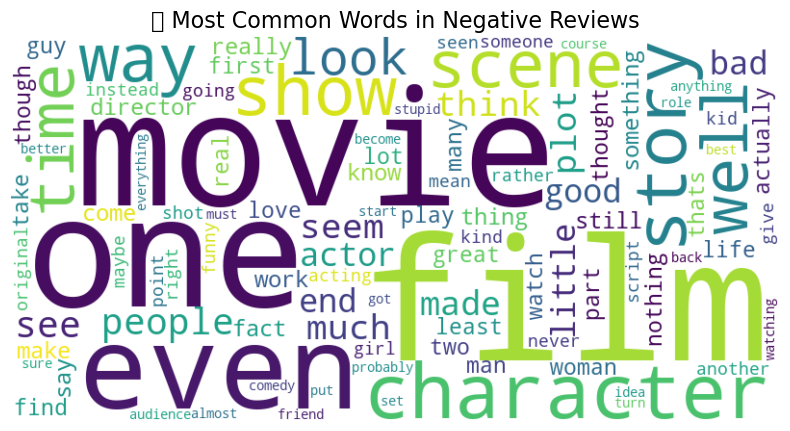

In [4]:
# Create word clouds for positive and negative sentiments 
def create_wordcloud(text, title): 
    wordcloud = WordCloud(width=800,height=400,background_color='white',max_words=100,colormap='viridis').generate(text) 
    
    plt.figure(figsize=(10, 5)) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.title(title, fontsize=16) 
    plt.axis('off') 
    plt.show() 
# Combine all positive reviews 
positive_text = ' '.join(df[df['sentiment'] == 'positive']['processed_review']) 
create_wordcloud(positive_text, '☀ Most Common Words in Positive Reviews')
# Combine all negative reviews 
negative_text = ' '.join(df[df['sentiment'] == 'negative']['processed_review']) 
create_wordcloud(negative_text, '⛈ Most Common Words in Negative Reviews') 

In [5]:
# Save processed data
df_processed = df[['processed_review', 'sentiment']].copy() 
df_processed.to_csv('IMDB_Dataset.csv', index=False)

print("💾 Processed data saved to'IMDB_Dataset.csv'") 
print(f"✅ Dataset ready for modeling with {len(df_processed)} samples")

💾 Processed data saved to'IMDB_Dataset.csv'
✅ Dataset ready for modeling with 50000 samples


In [11]:
# Save processed data
df_processed = df[['processed_review', 'sentiment']].copy()
df_processed.to_csv('IMDB_Dataset.csv', index=False)

print("💾 Processed data save to'IMDB_Dataset.csv'")
print(f"✅ Dataset ready for modeling with {len(df_processed)} samples")

💾 Processed data save to'IMDB_Dataset.csv'
✅ Dataset ready for modeling with 50000 samples


In [13]:
print(df.columns.tolist())

['review', 'sentiment', 'cleaned_review', 'processed_review', 'original_length', 'processed_length']


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [17]:
print(df.columns.tolist())

['review', 'sentiment', 'cleaned_review', 'processed_review', 'original_length', 'processed_length']


In [19]:
X = df['processed_review']
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

print(f"📈 Training set size: {len(X_train)}")
print(f"📉 Test set size: {len(X_test)}")

# Feature extraction with TF-IDF
print("\n🔄 Creating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), min_df=2,max_df=0.95)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"✅ Feature matrix shape: {X_train_tfidf.shape}")
print(f"📝 Feature names sample: {tfidf.get_feature_names_out()[:10]}")

📈 Training set size: 40000
📉 Test set size: 10000

🔄 Creating TF-IDF features...
✅ Feature matrix shape: (40000, 1000)
📝 Feature names sample: ['ability' 'able' 'absolutely' 'accent' 'across' 'act' 'acted' 'acting'
 'action' 'actor']


In [21]:
# Define models to compare
models = {'Logistic Regression': LogisticRegression(random_state=42,max_iter=500),'Naive Bayes': MultinomialNB(),'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),'SVM': SVC(kernel='linear', random_state=42, probability=True)}

# Train and evaluate models
results = {}
trained_models = {}

for name, model in models.items():
  print(f"\n🔄 Training {name}...")

# Train model
model.fit(X_train_tfidf, y_train)
trained_models[name] = model

# Cross-validation score
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=3,scoring='accuracy')

# Test accuracy
y_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_pred)

results[name] = {'CV Mean': cv_scores.mean(),'CV Std': cv_scores.std(),'Test Accuracy': test_accuracy}

print(f"✅ {name} - CV: {cv_scores.mean():.4f}(±{cv_scores.std():.4f}), Test: {test_accuracy:.4f}")

# Display results
results_df = pd.DataFrame(results).T
display(results_df)


🔄 Training Logistic Regression...

🔄 Training Naive Bayes...

🔄 Training Random Forest...

🔄 Training SVM...
✅ SVM - CV: 0.8546(±0.0016), Test: 0.8590


,CV Mean,CV Std,Test Accuracy
SVM,0.8546,0.001594,0.859


🏆 Best Model: SVM
🎯 Test Accuracy: 0.8590

📊 Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.86      5000
    positive       0.86      0.86      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



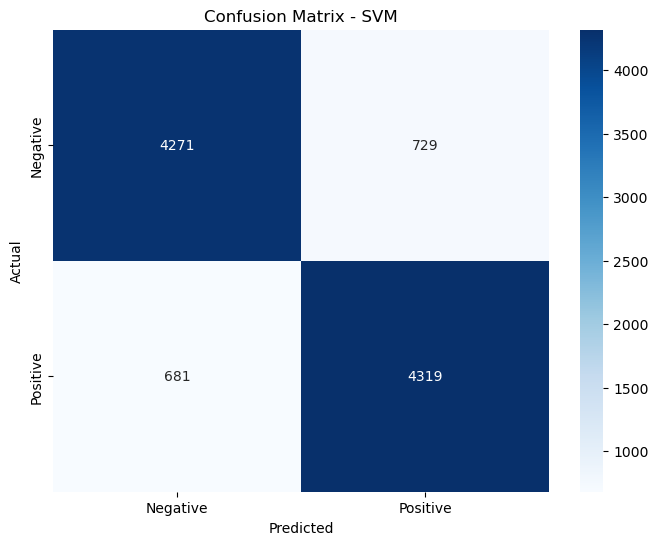

In [27]:
# Select best model (highest test accuracy)
best_model_name = results_df['Test Accuracy'].idxmax()
best_model = trained_models[best_model_name]

print(f"🏆 Best Model: {best_model_name}")
print(f"🎯 Test Accuracy: {results_df.loc[best_model_name, 'Test Accuracy']:.4f}")

# Detailed evaluation
y_pred = best_model.predict(X_test_tfidf)
y_pred_proba = best_model.predict_proba(X_test_tfidf)

print(f"\n📊 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'])

plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [28]:
if best_model_name == 'Logistic Regression':
   feature_names = tfidf.get_feature_names_out()
   coefficients = best_model.coef_[0]

   top_positive = np.argsort(coefficients)[-10:]
   top_negative = np.argsort(coefficients)[:10]
   print("\n📈 Top 10 Positive Sentiment Features:")
   for i in reverse(top_positive):
       print(f" {feature_names[i]}: {coefficients[i]:.4f}")

   print("\n📉 Top 10 Negative Sentiment Features:")
   for i in top_negative:
       print(f" {feature_names[i]}: {coefficients[i]:.4f}")

In [29]:
# Save the best model and vectorizer
import os
import joblib
import json

# Create the directory if it doesn't exist
os.makedirs('/content/models', exist_ok=True)

# Define filenames
model_filename = f"/content/models/best_sentiment_model_logistic_regression{best_model_name.lower().replace(' ','_')}.pkl"
vectorizer_filename = '/content/models/tfidf_vectorizer.pkl'
model_info_filename = '/content/models/model_info.json'

# Save the model and vectorizer
joblib.dump(best_model, model_filename)
joblib.dump(tfidf, vectorizer_filename)

print(f"💾 Model saved: {model_filename}")
print(f"💾 Vectorizer saved: {vectorizer_filename}")

# Create model info dictionary
model_info = {
    'model_type': best_model_name,
    'test_accuracy': results_df.loc[best_model_name, 'Test Accuracy'],
    'cv_mean': results_df.loc[best_model_name, 'CV Mean'],
    'cv_std': results_df.loc[best_model_name, 'CV Std'],
    'features': X_train_tfidf.shape[1]
}

# Save model info to a JSON file
with open(model_info_filename, 'w') as f:
    json.dump(model_info, f, indent=2)

print(f"📋 Model information saved to {model_info_filename}")

💾 Model saved: /content/models/best_sentiment_model_logistic_regressionsvm.pkl
💾 Vectorizer saved: /content/models/tfidf_vectorizer.pkl
📋 Model information saved to /content/models/model_info.json


In [43]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.8 MB/s eta 0:00:00


In [45]:
import pandas as pd
import numpy as np
import joblib
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Load model and vectorizer
try:
   model =joblib.load('/content/models/best_sentiment_model_logistic_regressionsvm.pkl')
   tfidf = joblib.load('/content/models/tfidf_vectorizer.pkl')
   print("✅ Model and vectorizer loaded successfully!")
except:
   print("❌ Could not load model. Make sure you've run the training notebook first.")

✅ Model and vectorizer loaded successfully!


In [55]:
def preprocess_text(text):
    """Preprocess text for prediction"""
# Convert to lowercase
    text = text.lower()

# Remove HTML tags

    text = re.sub(r'<[^>]+>', '', text)

# Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

# Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

# Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

# Tokenize
    tokens = word_tokenize(text)

# Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

# Tokenize
    tokens = word_tokenize(text)

# Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

# Lemmatization
    lemmatizer = WordNetLemmatizer()

    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)


# Test the preprocessing
test_text = "This movie was absolutely amazing! I loved every minute of it."
print(f"Original: {test_text}")
print(f"Processed: {preprocess_text(test_text)}")

Original: This movie was absolutely amazing! I loved every minute of it.
Processed: movie absolutely amazing loved every minute


In [57]:
def predict_sentiment(text):
    """Predict sentiment of given text"""
    if not text.strip():
       return "Please enter some text", 0.0, "neutral"

# Preprocess text
    processed_text = preprocess_text(text)

# Transform using TF-IDF
    text_tfidf = tfidf.transform([processed_text])

# Predict
    prediction = model.predict(text_tfidf)[0]
    probabilities = model.predict_proba(text_tfidf)[0]
    confidence = max(probabilities)

# Get probability for each class
    if model.classes_[0] == 'negative':
        prob_negative = probabilities[0]
        prob_positive = probabilities[1]
    else:
       prob_negative =  probabilities[1]
       prob_positive =  probabilities[0]

    return prediction, confidence, prob_negative, prob_positive

# Test prediction
test_result = predict_sentiment("This movie was terrible and boring!")
print(f"Prediction: {test_result}")

Prediction: ('negative', 0.9999633149773561, 0.9999633149773561, 3.6685022643744856e-05)


In [59]:
# Sample texts for testing
sample_texts = [
   "This movie was absolutely fantastic! Great acting and storyline.",
   "Terrible film, complete waste of time and money.",
   "The movie was okay, nothing special but not bad either.",
   "I loved the cinematography but the plot was confusing.",
   "Worst movie I've ever seen, don't watch it!",
   "Amazing performances by all actors, highly recommended!",
   "The movie had its moments but overall disappointing.",
   "Brilliant direction and excellent screenplay.",
   "Boring and predictable, fell asleep halfway through.",
   "A masterpiece of modern cinema, truly inspiring!"]

print("🧪 BATCH TESTING WITH SAMPLE TEXTS")
print("=" * 50)

results = []
for i, text in enumerate(sample_texts, 1):
   prediction, confidence, prob_neg, prob_pos = predict_sentiment(text)
   results.append({
      'Text': text[:50] + '...' if len(text) > 50 else text,
      'Prediction': prediction,
      'Confidence': f"{confidence:.2%}",
      'Positive_Prob': f"{prob_pos:.2%}",
      'Negative_Prob': f"{prob_neg:.2%}"})

emoji = "😊" if prediction == 'positive' else "😞"
print(f"{i:2d}. {emoji} {prediction.upper()} ({confidence:.2%}) -{text[:60]}{'...' if len(text) > 60 else ''}")

# Create results DataFrame
results_df = pd.DataFrame(results)
print(f"\n📊 DETAILED RESULTS:")
display(results_df)

🧪 BATCH TESTING WITH SAMPLE TEXTS
10. 😊 POSITIVE (95.67%) -A masterpiece of modern cinema, truly inspiring!

📊 DETAILED RESULTS:


,Text,Prediction,Confidence,Positive_Prob,Negative_Prob
0,This movie was absolutely fantastic! Great act...,positive,94.61%,94.61%,5.39%
1,"Terrible film, complete waste of time and money.",negative,100.00%,0.00%,100.00%
2,"The movie was okay, nothing special but not ba...",negative,99.88%,0.12%,99.88%
3,I loved the cinematography but the plot was co...,positive,89.33%,89.33%,10.67%
4,"Worst movie I've ever seen, don't watch it!",negative,99.54%,0.46%,99.54%
5,"Amazing performances by all actors, highly rec...",positive,100.00%,100.00%,0.00%
6,The movie had its moments but overall disappoi...,positive,71.60%,71.60%,28.40%
7,Brilliant direction and excellent screenplay.,positive,97.59%,97.59%,2.41%
8,"Boring and predictable, fell asleep halfway th...",negative,99.95%,0.05%,99.95%
9,"A masterpiece of modern cinema, truly inspiring!",positive,95.67%,95.67%,4.33%


In [131]:
# Create interactive widget
text_input = widgets.Textarea(
    value='',
    placeholder='Type your review or text here',
    description='Text:',
    layout=widgets.Layout(width='100%', height='100px'))

predict_button = widgets.Button(
    description='🔍 Analyze Sentiment',
    button_style='primary',
    layout=widgets.Layout(width='200px'))

output_area = widgets.Output()

def on_predict_button_clicked(b):
    with output_area:
        clear_output()
        text = text_input.value.strip()

        if text:
            # Use the predict_sentiment function defined previously that uses the trained model
            prediction, confidence, prob_negative, prob_positive = predict_sentiment(text)

            print("🎯 SENTIMENT ANALYSIS RESULTS")
            print("=" * 40)
            print(f"📝 Input Text: {text[:100]}{'...' if len(text) > 100 else ''}")
            print(f"️ Predicted Sentiment: {prediction.upper().lower()}")
            print(f"🎲 Confidence: {confidence:.2%}")
            print(f"📊 Probability Breakdown:")
            print(f" 😊 Positive: {prob_positive:.2%}") # Corrected variable name
            print(f" 😞 Negative: {prob_negative:.2%}") # Corrected variable name

            # Create visualization
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

            # Confidence meter
            colors = ['red' if prediction == 'negative' else 'green']
            ax1.barh(['Confidence'], [confidence], color=colors)
            ax1.set_title('Prediction Confidence')
            ax1.set_xlim(0, 1)
            ax1.set_xlabel('Confidence Score')

            # Probability comparison
            sentiments = ['Negative', 'Positive']
            probabilities = [prob_negative, prob_positive] # Corrected variable names
            colors = ['lightcoral', 'lightgreen']
            bars = ax2.bar(sentiments, probabilities, color=colors)
            ax2.set_ylim(0, 1)
            ax2.set_title('Sentiment Probabilities')
            ax2.set_ylabel('Probability')

            # Add value labels on bars
            for bar, prob in zip(bars, probabilities):
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                         f'{prob:.2%}', ha='center', va='bottom')

            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ Please enter some text to analyze!")

predict_button.on_click(on_predict_button_clicked)

display(widgets.VBox([
    widgets.HTML("<h2>🤖 Interactive Sentiment Analysis Tool</h2>"),
    text_input,
    predict_button,
    output_area]))